In [117]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [118]:
df = pd.read_csv('Titanic.csv')

In [119]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [138]:
df.Sex = df.Sex.astype('category')
df.Name = df.Name.astype('category')
df.Ticket= df.Ticket.astype('category')
df.Cabin = df.Cabin.astype('str')
df.Embarked = df.Embarked.astype('category')

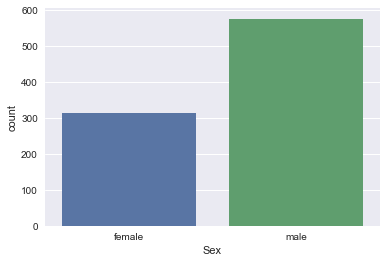

In [121]:
sns.countplot('Sex', data = df, order=['female', 'male'])

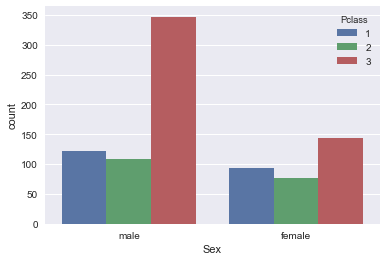

In [122]:
sns.countplot('Sex', data = df, hue = 'Pclass')

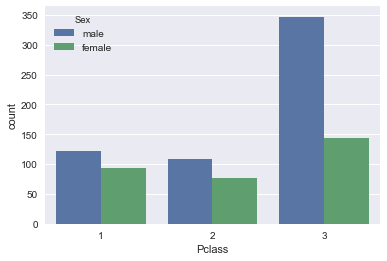

In [123]:
sns.countplot('Pclass', data = df, hue = 'Sex')

In [124]:
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [125]:
df['Person'] = df[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


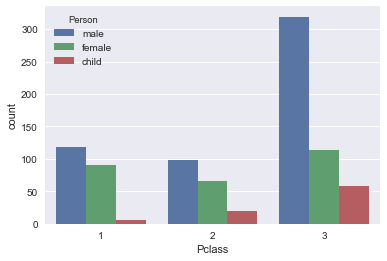

In [127]:
sns.countplot('Pclass', data = df, hue= 'Person')

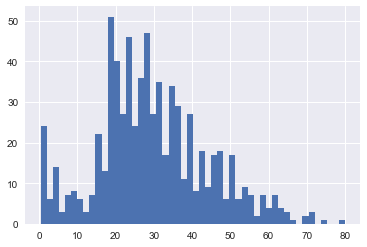

In [128]:
df.Age.hist(bins = 50)

In [129]:
df.Age.mean()

29.69911764705882

In [130]:
df.Person.value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

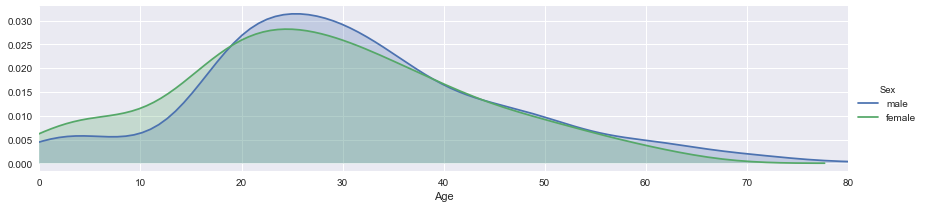

In [131]:
fig = sns.FacetGrid(df, hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim=(0, oldest))
fig.add_legend()

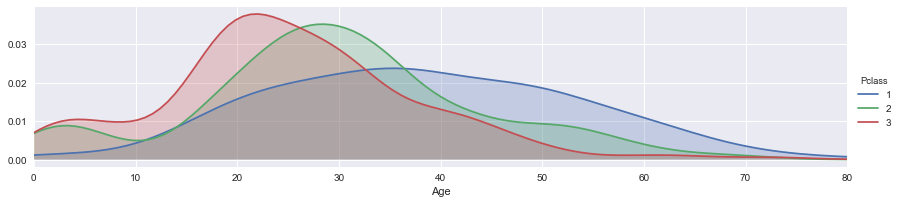

In [20]:
fig = sns.FacetGrid(df, hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim=(0, oldest))
fig.add_legend()

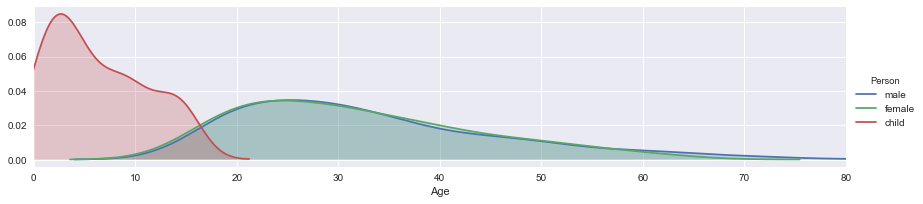

In [21]:
fig = sns.FacetGrid(df, hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)
oldest = df.Age.max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [135]:
deck = df.Cabin
deck.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [136]:
#grabing the first letter of the deck
levels = []
for level in deck:
    levels.append(level[0])

TypeError: 'float' object is not subscriptable

In [145]:
levels1 = []
for level in df.Cabin:
    if df.Cabin.isnull:
        levels1.append(level[0])
    else:
        levels1.append('0')
df['Deck'] = levels1

In [151]:
df.head(150)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,male,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,female,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,male,n
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,nan,Q,male,n
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,nan,S,child,n
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,nan,S,female,n
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,nan,C,child,n


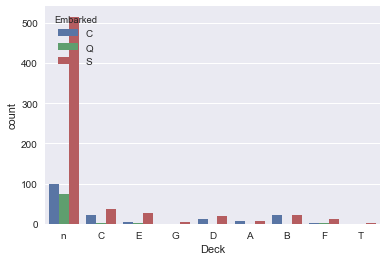

In [148]:
sns.countplot(x = 'Deck', data = df, hue='Embarked')
#majority in unknown deck got in S

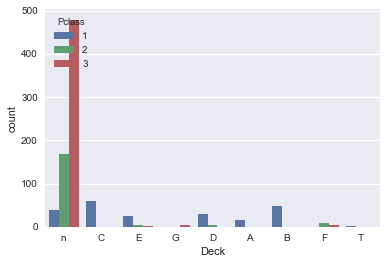

In [149]:
sns.countplot(x = 'Deck', data = df, hue='Pclass')

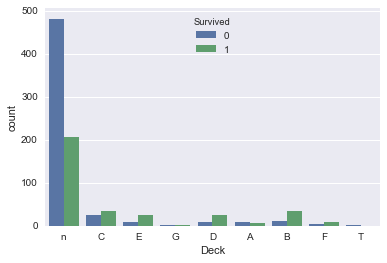

In [150]:
sns.countplot(x = 'Deck', data = df, hue='Survived')

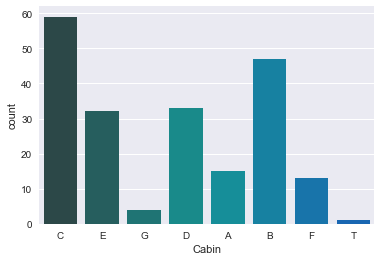

In [113]:
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.countplot('Cabin', data = cabin_df, palette='winter_d')

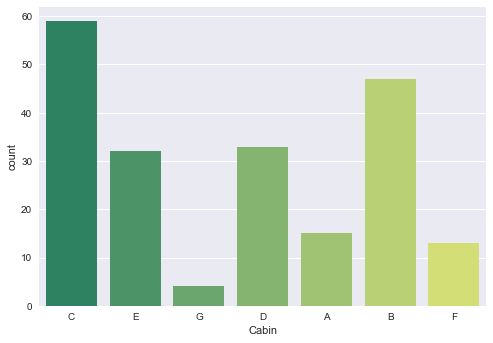

In [25]:
cabin_df = cabin_df[cabin_df != 'T']
sns.countplot('Cabin', data = cabin_df, palette='summer')

In [26]:
df.Embarked.unique()

[S, C, Q, NaN]
Categories (3, object): [S, C, Q]

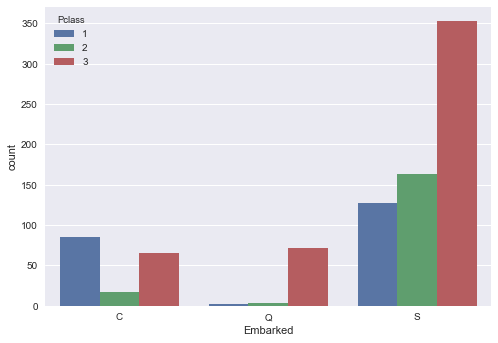

In [27]:
sns.countplot('Embarked', data = df, hue = 'Pclass', order = ['C', 'Q', 'S'])

In [153]:
df['Alone'] = df['SibSp'] + df['Parch']

In [154]:
df['Alone'].loc[df.Alone > 0] = 'With family'
df['Alone'].loc[df.Alone == 0] = 'Alone'

c:\programdata\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [155]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Deck,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,nan,S,male,n,With family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,nan,S,female,n,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,nan,S,male,n,Alone


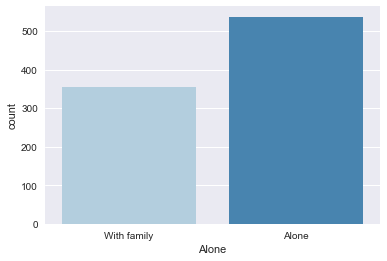

In [156]:
sns.countplot("Alone", data = df, palette = 'Blues')

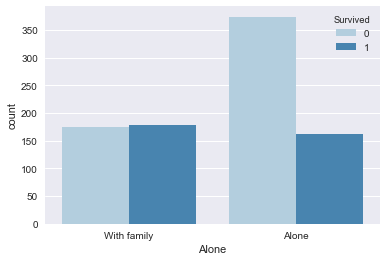

In [157]:
sns.countplot("Alone", data = df, palette = 'Blues', hue = 'Survived')

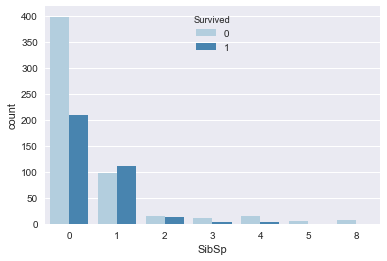

In [159]:
sns.countplot("SibSp", data = df, palette = 'Blues', hue = 'Survived')

In [78]:
#reassign values of Survived column to Survivors using dictionary Lection 36
df['Survivor'] = df['Survived'].map({0: 'no', 1: 'yes'})

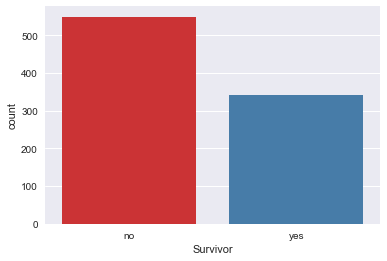

In [79]:
sns.countplot('Survivor', data = df, palette = 'Set1')

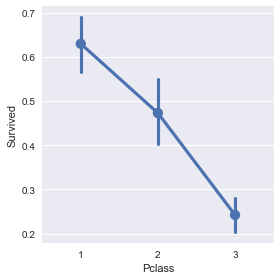

In [80]:
sns.factorplot('Pclass', 'Survived', data = df)

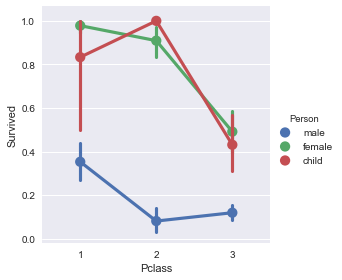

In [81]:
sns.factorplot('Pclass', 'Survived', data = df, hue= 'Person')

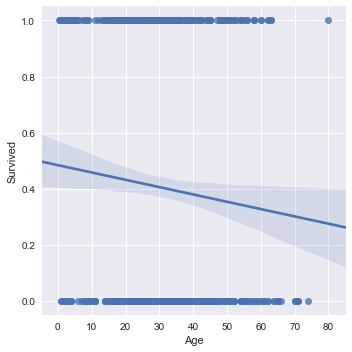

In [82]:
sns.lmplot('Age', 'Survived', data = df)

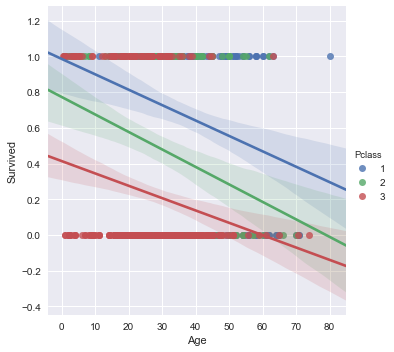

In [83]:
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = df)

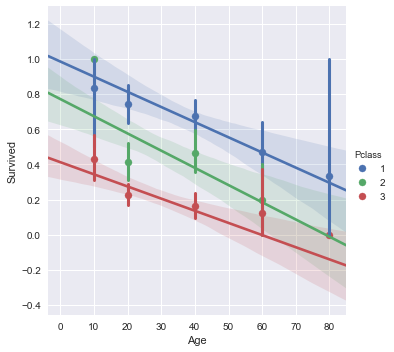

In [84]:
generations = [10,20,40,60,80]
sns.lmplot('Age', 'Survived', hue = 'Pclass', data = df, x_bins = generations)

In [46]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


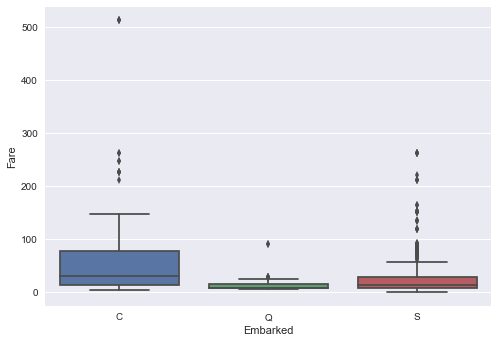

In [58]:
#deck - effect on survival rage 
sns.boxplot(x='Embarked', y = 'Fare', data =df)

In [85]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [89]:
df.Embarked = df.Embarked.fillna("S")

In [ ]:
sns.countplot(x =, hue = 'Survived')

In [114]:
df.Deck = df.Cabin.apply(df.Cabin[0])

TypeError: 'float' object is not callable